The whole idea behind KNN model is ,how many clusters your data should be divided into.The optimal value of K is used to determine those clusters.
The elbow method is the most commonly used method to decide the K value.

In [1]:
import pandas as pd

df=pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Exploratory Data Analysis

In [2]:
#data description
print(df.shape)
print(df.describe())
print(df.info())

(400, 5)
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), objec

In [3]:
#checking the types of gender
print(df.Gender.value_counts())
print("******************")
#checking duplicates
print(df.duplicated().sum())
print("******************")
#checking the number of null values
print(df.isna().sum())
print("******************")

Female    204
Male      196
Name: Gender, dtype: int64
******************
0
******************
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
******************


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

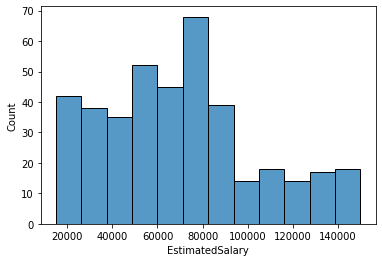

In [4]:
#Checking the distribution of the salary
import seaborn as sns

sns.histplot(df.EstimatedSalary)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

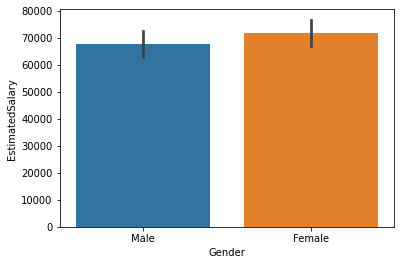

In [5]:
sns.barplot(x=df.Gender,y=df.EstimatedSalary)


In [6]:

pd.crosstab(df.Gender,df.Purchased)


Purchased,0,1
Gender,,
Female,127,77
Male,130,66


Analysis:
The entire analysis on the sample data states  that, women are earning little more than men here and their purchase count is higher too.
The salary is almost normally  distributed .

In [7]:
#creating dummies
df1=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)

In [8]:
#Defining the x and y 
# we will be dropping the USER ID colum as it does not impact the Y
x=df1.drop(columns=['User ID','Purchased'])
y=df1.Purchased

In [9]:
#Splitting the dat into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.3)

In [10]:
#Standerizing the data and creating a KNN model 
# Pipeline is used to process multiple steps together in this case both standerization and KNN estimator object creation is done at the same time.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
model_steps=[('sipStanderise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2))]#we will start with random value of k ,i.e n_neighbors

In [11]:
#Fitting the model
pipelineModel=Pipeline(steps=model_steps)
pipelineModel.fit(x_train,y_train)

Pipeline(steps=[('sipStanderise', StandardScaler()),
                ('shipModel', KNeighborsClassifier(n_neighbors=4))])

In [12]:
#Model score for train data
pipelineModel.score(x_train,y_train)

0.9142857142857143

In [13]:
#Model score on test data
pipelineModel.score(x_test,y_test)

0.9166666666666666

In [14]:
#Evaluating the model prediction
predic_test_y=pipelineModel.predict(x_test)
pd.crosstab(y_test,predic_test_y)

col_0,0,1
Purchased,,
0,76,7
1,3,34


In [15]:
#Model Evaluation 2
from sklearn.metrics import classification_report
print(classification_report(y_test,predic_test_y))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        83
           1       0.83      0.92      0.87        37

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



### Checking the best K value for our classification Model

In [16]:
#create 2 list for storing all the model score for diffrent K values
trainAccuracy=[]
testAccuracy=[]

In [17]:
#create model for K values from 1 to 40
for k in range(1,40):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    trainAccuracy.append(model.score(x_train,y_train))
    testAccuracy.append(model.score(x_test,y_test))

In [18]:
from matplotlib import pyplot as plt,style
style.use('ggplot')

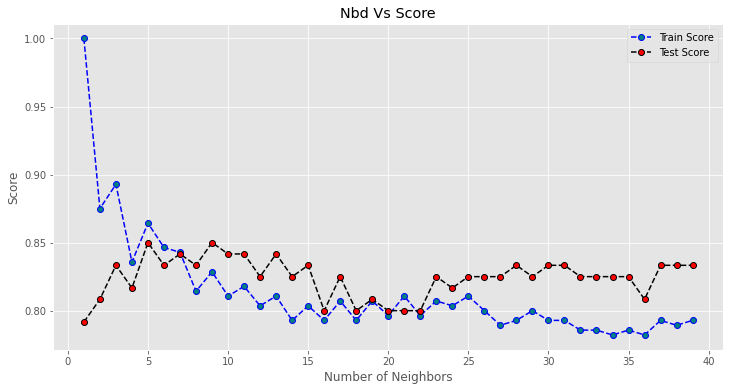

In [19]:
#create a plot using the information from the above loop
plt.figure(figsize=(12,6))
plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

We can see the optimal value of K is 8.

In [20]:
#creating a model using K =8
model_steps_20=[('sipStanderise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2))]
pipelineModel=Pipeline(steps=model_steps_20)
pipelineModel.fit(x_train,y_train)
print("score is:"+ str(pipelineModel.score(x_train,y_train)))
print("********************************")
pipelineModel.score(x_test,y_test)
predic_test_y=pipelineModel.predict(x_train)
print(pd.crosstab(y_train,predic_test_y))

score is:0.9071428571428571
********************************
col_0        0   1
Purchased         
0          160  14
1           12  94


We can see that there is a little improvment in prediction after using the optimal valus of K.